# Functionality demonstration

This demonstration includes replaying PCAP file (https://www.malware-traffic-analysis.net/2022/01/07/index.html) and analyzing traffic using the trained autoencoder. 

In [ ]:
import pandas as pd
import numpy as np
from solution.feature_extraction import FeatureExtraction
from solution.prediction import predict, prepare_test_df, plot_reconstruction_error
from solution.evaluation import get_fpr, get_tpr

THRESHOLD1 = 0.03612  # model.ipynb

df = pd.read_pickle("resources/data.pkl")

In [5]:
def get_labels(
    test_df: pd.DataFrame, fe_alert_df: pd.DataFrame, fe_val_df: pd.DataFrame
) -> tuple[pd.DataFrame, np.ndarray]:
    """Identify anomalies in test dataframe based on the obtain alerts."""

    # Group by source and destination IP adresses
    groups = fe_alert_df.groupby(["src_ip", "dst_ip"])
    # Extract IP adresses combinations from alert dataframe
    ip_list = [group_name for group_name, _ in groups]
    ip_set_list = [set(pair) for pair in ip_list]

    # Set mask
    mask = fe_val_df.apply(
        lambda x: set([x["src_ip"], x["dst_ip"]]) in ip_set_list, axis=1
    )

    # Label rows as anomalies
    test_df.loc[fe_val_df[mask].index, "is_anomaly"] = True

    print(
        "Number of anomalies in test data:",
        len(test_df.loc[test_df["is_anomaly"] == True]),
    )

    # Extract labels
    labels = test_df["is_anomaly"].to_numpy()

    # Return test dataframe to its original size
    test_df.drop("is_anomaly", axis=1, inplace=True)

    return test_df, labels

In [6]:
from keras.models import load_model

autoencoder = load_model("model1")

In [ ]:
index_name = "so-import-2022.01.07"
fe = FeatureExtraction([index_name], 1000)

test_df = fe.parse_logs(get_dataset_alert=True)
fe_val_df = fe.get_validation_dataframe(test_df)
fe_alert_df = fe.get_alert_dataset(test_df)
test_df = fe.preprocess_dataframe(test_df)

In [14]:
fe_alert_df

,dataset,src_ip,src_port,dst_ip,dst_port,protocol,transport,src_country_name,dst_country_name,conn_state,...,conn_bytes_toclient,dns_query_name,dns_query_type,dns_response_code,http_request_method,http_body_length,http_status_code,http_status_message,file_size,file_source
391,alert,2.56.57.108,80,192.168.1.216,49738,None,TCP,United States,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,alert,2.56.57.108,80,192.168.1.216,49738,None,TCP,United States,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,alert,192.168.1.216,49738,2.56.57.108,80,None,TCP,None,United States,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,alert,2.56.57.108,80,192.168.1.216,49738,None,TCP,United States,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,alert,2.56.57.108,80,192.168.1.216,49738,None,TCP,United States,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,alert,192.168.1.216,49761,192.168.1.2,139,None,TCP,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,alert,192.168.1.216,49763,192.168.1.2,139,None,TCP,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,alert,192.168.1.216,49738,2.56.57.108,80,None,TCP,None,United States,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,alert,2.56.57.108,80,192.168.1.216,49738,None,TCP,United States,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,alert,2.56.57.108,80,192.168.1.216,49738,None,TCP,United States,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Reshape test dataframe for autoencoder analysis
test_df = prepare_test_df(test_df, df)

# Add validation column - label
test_df["is_anomaly"] = False

# Get labels extracted from alert dataframe
test_df, labels = get_labels(test_df, fe_alert_df, fe_val_df)

Number of anomalies in test data: 307


13/13 [==============================] - 0s 5ms/step


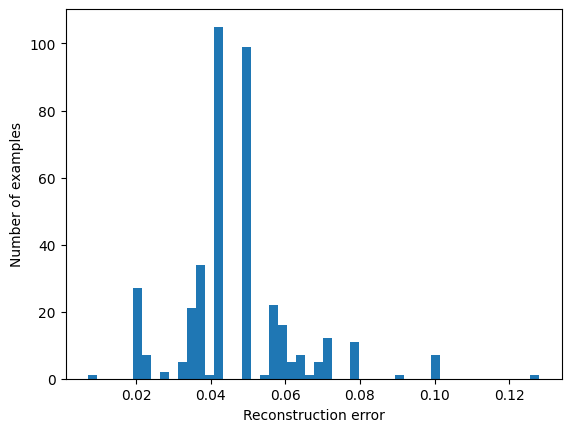

Threshold:  0.03612
Number of normal logs:  63
Number of anomalies:  328


In [16]:
# Analyze test data using autoencoder
reconstruction_error = predict(autoencoder, test_df, plot=True)

print("Threshold: ", THRESHOLD1)
print(
    "Number of normal logs: ",
    reconstruction_error[reconstruction_error <= THRESHOLD1].size,
)
print(
    "Number of anomalies: ",
    reconstruction_error[reconstruction_error > THRESHOLD1].size,
)

In [20]:
# Get predictions based on a threshold value
preds = reconstruction_error > THRESHOLD1

# Get TPR and FPR
tpr = get_tpr(preds, labels)
fpr = get_fpr(preds, labels)

print(f"Threshold: {THRESHOLD1}\nTrue positive rate: {tpr}\nFalse positive rate: {fpr}")

Threshold: 0.03612
True positive rate: 0.996742671009772
False positive rate: 0.2619047619047619


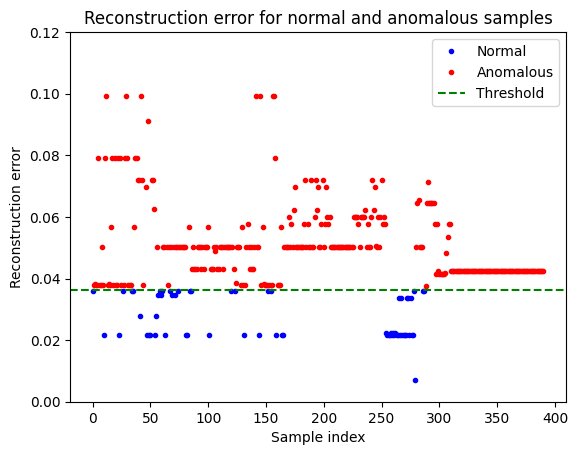

In [19]:
# Plot reconstruction error points
plot_reconstruction_error(reconstruction_error, THRESHOLD1, (0, 0.12))